# Movies data analysis

# Dataset Description:
  This data set contains information about +9000 movies extracted from TMDB API.

# Columns Descriptions:
   * Release_Date: Date when the movie was released.
   * Title: Name of the movie.
   * Overview: Brief summary of the movie.
   * Popularity: It is a very important metric computed by TMDB developers based on the number of views per day, votes per day, number of users marked it as "favorite" and "watchlist" for the data, release date and more other metrics.
   * Vote_Count: Total votes received from the viewers.
   * Vote_Average: Average rating based on vote count and the number of viewers out of 10.
   * Original_Language: Original language of the movies. Dubbed version is not considered to be original language.
     Genre: Categories the movie it can be classified as.
   * Poster_Url: Url of the movie poster.

# Import Libraries and Data:

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


In [62]:
df = pd.read_csv('mymoviedb.csv',lineterminator='\n')

# Data preparation:

In [36]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


 * looks like our dataset has no NaNs!
 * Overview and Poster-Url wouldn't be so useful during analysis

In [38]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [39]:
df.shape

(9827, 9)

In [40]:
# droping some useless columns 
df=df.drop(columns=['Overview','Poster_Url'])

In [41]:
df.duplicated().sum()

0

# Exploration Summarey
 * we have a dataframe consisting of 9827 rows and 9 columns.
 * our dataset looks a bit tidy with no NaNs nor duplicated values.
 * in Release_Date column we need to extract only the year value.
 * Overview and Poster-Url wouldn't be so useful during analysis, so we dropped them.
 * there is noticable outliers in Popularity column
 * Genre column has comma saperated values and white spaces that needs to be handled and casted into category.

# data Cleaning

In [42]:
# casting column 
df['Release_Date'] = pd.to_datetime(df['Release_Date'])

# confirming changes
print(df['Release_Date'].dtypes)

datetime64[ns]


In [43]:
df['Release_Date'] = df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int64')

In [44]:
df["Release_Date"].unique()

array([2021, 2022, 2020, 1986, 2018, 1989, 2012, 2009, 2005, 2019, 2014,
       2016, 2001, 2015, 2002, 2017, 2011, 2007, 2004, 2010, 1972, 2023,
       2008, 1995, 1994, 1992, 2013, 2003, 2006, 1999, 1993, 1985, 1998,
       1950, 1997, 2000, 1991, 1937, 1990, 1977, 1940, 1981, 1942, 1973,
       1941, 1974, 1951, 1996, 1959, 1961, 1967, 1953, 1988, 1956, 1983,
       1976, 1955, 1970, 1984, 1971, 1987, 1963, 1980, 1939, 1975, 1979,
       1982, 1966, 1978, 1965, 1946, 1964, 1968, 1962, 1960, 1957, 1949,
       1922, 2024, 1969, 1954, 1933, 1932, 1958, 1952, 1944, 1931, 1948,
       1938, 1945, 1927, 1925, 1935, 1936, 1902, 1920, 1947, 1943, 1929,
       1926, 1921, 1930], dtype=int64)

# we are in 2022 and there are dates in 2023, so we will drop them 

In [45]:
movies1=df.loc[df["Release_Date"] == 2023]
df.drop(movies1.index, inplace=True)

In [46]:
df.shape

(9819, 7)

# the movies in 2022 maybe coming out soon or currently showing so some of them don't have chance to be rated 

In [47]:
movies2=df.loc[(df.Vote_Count==0)&(df.Release_Date==2022)]
movies2.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
80,2022,Sonic the Hedgehog 2,317.159,0,0.0,en,"Action, Science Fiction, Comedy, Family"
231,2022,Dragon Ball Super: Super Hero,170.551,0,0.0,ja,"Animation, Science Fiction, Action"
232,2022,After Ever Happy,169.964,0,0.0,en,Romance
314,2022,The Bad Guys,146.548,0,0.0,en,"Animation, Comedy, Action, Family, Crime"
322,2022,Doctor Strange in the Multiverse of Madness,144.134,0,0.0,en,"Fantasy, Action, Adventure"


In [48]:
# we will drop them 
df.drop(movies2.index, inplace=True)
df.shape

(9737, 7)

# Handling `Genre` column (So I'm going to leave only the first category from the left side)


In [49]:
df["Genre"]= df["Genre"].str.split(',').str[0]

# confirming changes
df["Genre"].unique()

array(['Action', 'Crime', 'Thriller', 'Animation', 'Horror',
       'Science Fiction', 'Fantasy', 'Romance', 'Drama', 'Western',
       'Family', 'Comedy', 'Adventure', 'Mystery', 'TV Movie',
       'Documentary', 'War', 'Music', 'History'], dtype=object)

In [50]:
# casting column into category
df["Genre"] = df["Genre"].astype("category")

# confirming changes
df["Genre"].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False)

# handling language column 

In [63]:
df['Original_Language'].value_counts()

en    7570
ja     645
es     339
fr     292
ko     170
zh     129
it     123
cn     109
ru      83
de      82
pt      37
da      28
no      26
hi      26
sv      23
nl      21
pl      17
th      17
id      15
tr      15
tl       8
te       6
el       5
fi       5
sr       5
cs       4
fa       3
hu       3
is       2
ro       2
uk       2
ta       2
ar       2
he       2
ca       1
la       1
nb       1
bn       1
ms       1
lv       1
eu       1
ml       1
et       1
Name: Original_Language, dtype: int64

In [58]:
df['Original_Language']=df['Original_Language'].replace(to_replace=['pl','th','tr','id','tl','el','fi','te','sr','cs','fa','hu','is','ro','uk','ar','he','ta','ca','la','nb','bn','ms','ml','eu','et','cn','ru','de','pt','da','no','hi','sv','nl'],value='other')

In [61]:
df['Original_Language'].value_counts()

en       7512
ja        643
other     549
es        333
fr        280
ko        168
zh        129
it        123
Name: Original_Language, dtype: int64

# Data visualizing 

# what is the most frequent genre?

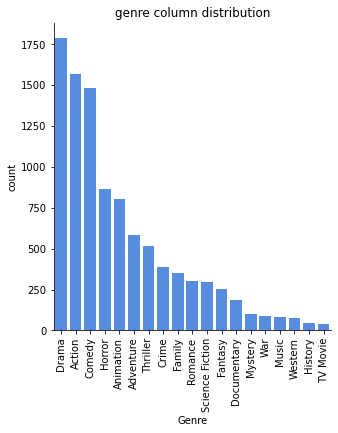

In [18]:
sns.catplot(x = 'Genre', data = df, kind = 'count', 
            order = df['Genre'].value_counts().index,
            color = '#4287f5')
plt.title('genre column distribution')
plt.xticks(rotation=90)
plt.show()

 the most frequent genre is drama 

# What genres has highest votes?

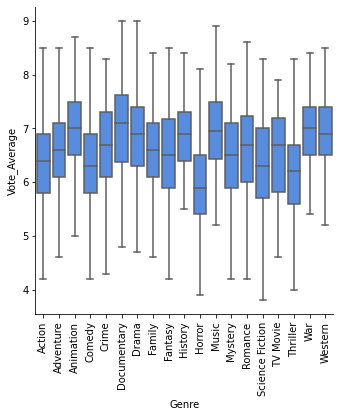

In [19]:
most_popular_genre=sns.catplot(x='Genre',y='Vote_Average',kind='box',data=df,sym='',color = '#4287f5')
plt.xticks(rotation=90)
plt.show()

drama and documentary have the highest votes

# What movie got the highest popularity? what's its genre?

In [20]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Original_Language,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,8.3,en,Action


we can see that Spider-Man: No Way Home has the highest popularity rate in our dataset and it has genres of Action.

# Which year has the most filmmed movies?

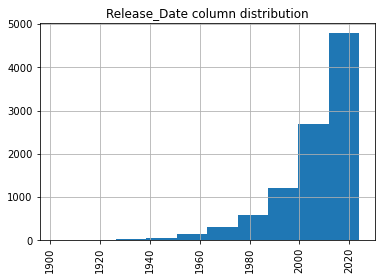

In [21]:
df['Release_Date'].hist()
plt.title('Release_Date column distribution')
plt.xticks(rotation=90)
plt.show()

# what is the most frequent language?

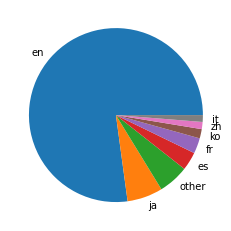

In [59]:
plt.pie(df['Original_Language'].value_counts(),labels=df['Original_Language'].value_counts().index)
plt.show()

the most frequent language is english